# Hotel Reservation Veri Setinin İncelenmesi

---

Hazırlayan: Buğra Akoğlu

## Çalışmanın Amacı

>Techcareer bünyesinde yapılan Datascience with Python bootcamp programının final projesi için yapılacak olan çalışmanın ana amacı bir veri setinin açıklayıcı istatistikleri kullanarak incelenmesi ve bir veya birden fazla makine öğrenmesi algoritması kullanarak tahmin değerleri elde ederek modelin veya modellerin performansların incelenmesi şeklindedir. 

> Tarafımca hazırlanın bu çalışmada Kaggle'dan ***Ahsan Raza*** tarafından paylaşılan açık lisansa sahip ***Hotel Reservations Dataset*** isimli veri seti kullanılmıştır.

Bkz: `https://www.kaggle.com/datasets/timoboz/data-science-cheat-sheets`

---

### Kullanılan Kütüphaneler:

In [47]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

---

## Veri Seti Hakkında

In [48]:
raw_data = pd.read_csv(r'C:\Users\akogl\OneDrive\Masaüstü\py_files\Bootcamp\proje\hotel\hotel.csv')

> Veri seti basit bir şekilde ilişkisel veri tabı sistemine uygun bir formattan her bir rezervasyon için oluşturulan *Booking_ID* eşsiz anahtar ile işaretlenmiş bir grup özelliklerden oluşmaktadır. Bu özelliklerden kısaca bahsetmek gerekirse:

- **Booking_ID**: *her rezervasyonun benzersiz tanımlayıcısı*

- **no_of_adults**: *Yetişkin sayısı*

- **no_of_children**: Çocuk Sayısı

- **no_of_weekend_nights**: *Misafirin otelde kaldığı veya kalmak için rezervasyon yaptırdığı hafta sonu gecelerinin sayısı (Cumartesi veya Pazar)*

- **no_of_week_nights**: *Misafirin otelde konakladığı veya konaklamak için rezervasyon yaptırdığı hafta içi gece sayısı (Pazartesi'den Cuma'ya)*

- **type_of_meal_plan**:* Müşteri tarafından rezerve edilen yemek planı türü:*

- **required_car_parking_space**: *Müşterinin bir araç park yerine ihtiyacı var mı? (0 - Hayır, 1- Evet)*

- **room_type_reserved**: *Müşteri tarafından rezerve edilen oda tipi. Değerler INN Hotels tarafından şifrelenir (kodlanır).*

- **lead_time**: *Rezervasyon tarihi ile varış tarihi arasındaki gün sayısı*

- **arrival_year**: *Varış tarihinin yılı*

- **arrival_month**: *Varış tarihinin ayı*

- **arrival_date**: *Ayın tarihi*

- **market_segment_type**: *Pazar segmenti tanımı.*

- **repeated_guest**: *Müşteri tekrarlanan bir misafir mi? (0 - Hayır, 1- Evet)*

- **no_of_previous_cancellations**: *Mevcut rezervasyondan önce müşteri tarafından iptal edilen önceki rezervasyonların sayısı*

- **no_of_previous_bookings_not_canceled**: *Geçerli rezervasyondan önce müşteri tarafından iptal edilmemiş önceki rezervasyonların sayısı*

- **avg_price_per_room**: *Rezervasyonun günlük ortalama fiyatı; oda fiyatları dinamiktir. (Euro cinsinden)*

- **no_of_special_requests**: *Müşteri tarafından yapılan özel taleplerin toplam sayısı (örn. yüksek kat, oda manzarası, vb.)*

- **booking_status**: *Rezervasyonun iptal edilip edilmediğini gösteren işaret.*

> şeklinde olup müşterilerin rezervasyon ayrıntılarının farklı özniteliklerini içermektedir.

In [49]:
raw_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


---

In [50]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

> Veri setinde 18 özellik ve 1 hedef değişken bulunmaktadır. Hedef değişken ***booking_status*** adlı sütundur ve bir rezervasyonun iptal edilip edilmediğini göstermektedir.

> Hedef değişken haricinde veri setinde 4 adet kategorik değişken (*type_of_meal_plan*,*room_type_reserved*,*market_segment_type*,*repeated_guest* ) ve 13 adet sayısal değişken bulunaktadır. > İlk sütunu oluşturan *Booking_ID* unique key olduğu için istatistiksel olarak anlamlı bir bilgi içermedeğinden analizin dışında bırakılacaktır.

---

### Verinin Temel Özellikleri

> Veri setine ait merkezi eğilim ölçüleri incelendiğinde *lead_time* *veavg_price_per_room* sütunları haricinde ortalam ve standart sapma bakımından çok büyük farklılıklar gözlemlenmemektedir. Bu durumdan dolayı bahsi geçen bu iki özellik için model eğitimi öncesinde bir standartlaştırma işleminin yapılması gerekebilir.

In [51]:
raw_data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


---

> *Booking_ID* üzerinden mükerrer kayıt kontrolü yapıldığında veri setinin herkangi bir tekrarlı kayıt barındırmadığı görülmektedir.

In [52]:
raw_data['Booking_ID'].duplicated().sum()

0

---

> *Na* ve *NaN* değerlerin kontrolünün yapılmasıyla birlikte veri setinden bu tip tanımsız girdilerin olmadığı görülmüştür.

In [53]:
raw_data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

---

## Verinin İşlenmesi ve Betimsel İstatistiklerin İncelenmesi:

In [54]:
# veri setinin bir kopyasının oluşturulması (işlemler yapılırken raw_data'nın bozulmaması amacıyla kopya oluşturulmuştur.)
df= raw_data.copy()

> Veri içerisinde bululan *no_of_weekend_nights* ve *no_of_week_nights* sütunları yapılan rezervasyonun kaç hafta içi geceye ve kaç hafata sonu geceye sahip olduğunu göstermektedir ancak bunların birleşimine tekabül eden bir *no_of_total_nights* sütunu bulunmamaktadır. Bu sütun basit bir şekilde hafta içi ve hafta sonu sütunlarının toplamı şeklinde oluşturulabilir.

In [55]:
new_col_name = 'no_of_total_nights'
df[new_col_name] = df['no_of_week_nights'] + df['no_of_weekend_nights']

# Yeni sütunu belirli bir sütun numarasına (örneğin 5. sütun) yerleştirelim
col_position = 5
df.insert(col_position, new_col_name, df.pop(new_col_name))

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,no_of_total_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,3,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,5,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,3,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,2,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


---

> Veri yapısı içinde bulunan tarihsel bilgi barındırında sütunlar yıl, ay ,gün olarak ayrı sütünlarda bulunmaktadır. Bir tarih sütunu oluşturarak bunların birleştirilmesi özellikle görselleştirmelerde lazım olacağından dolayı bu düzeltmenin öncelikle yapılması uygun olacaktır.

In [56]:
df[(df['arrival_month'] == 2) & (df['arrival_date'] == 29)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,no_of_total_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2626,INN02627,2,0,1,5,6,Meal Plan 1,0,Room_Type 1,104,2018,2,29,Online,1,1,0,61.43,0,Canceled
3677,INN03678,1,0,1,3,4,Meal Plan 1,0,Room_Type 1,21,2018,2,29,Online,0,0,0,102.05,0,Canceled
5600,INN05601,2,0,1,3,4,Meal Plan 1,0,Room_Type 1,24,2018,2,29,Offline,0,0,0,45.50,0,Not_Canceled
6343,INN06344,1,0,1,1,2,Meal Plan 1,0,Room_Type 1,117,2018,2,29,Offline,0,0,0,76.00,0,Not_Canceled
7648,INN07649,2,1,1,5,6,Meal Plan 1,0,Room_Type 1,35,2018,2,29,Online,0,0,0,98.10,1,Canceled
8000,INN08001,2,2,1,3,4,Meal Plan 1,0,Room_Type 6,3,2018,2,29,Online,0,0,0,183.00,1,Not_Canceled
8989,INN08990,1,0,1,2,3,Meal Plan 1,0,Room_Type 1,117,2018,2,29,Offline,0,0,0,76.00,0,Not_Canceled
9153,INN09154,2,2,1,3,4,Meal Plan 1,0,Room_Type 6,3,2018,2,29,Online,0,0,0,189.75,0,Not_Canceled
9245,INN09246,2,0,1,3,4,Meal Plan 1,0,Room_Type 4,15,2018,2,29,Online,0,0,0,85.55,1,Not_Canceled
9664,INN09665,1,0,1,0,1,Meal Plan 1,0,Room_Type 4,21,2018,2,29,Online,0,0,0,117.00,0,Not_Canceled


In [57]:
(df[df['arrival_month']== 2]['arrival_date']==29).sum()

37

> *Arrival_DateTime* sütunun oluşturulması sırasında ortaya çıkan bir *day is out of range for the month* hatası için tarih bilgisi barındıran sütunların incelenmesi sırasında 2018 ve 2017 yıllarının artık yıl olmamasına rağmen şubat aylarında 29. güne ait 37 tane veri girişi saptanmıştır. İnternette yayımlanan veriler simülasyon teknikleri ile oluşturulduğunda veya geçek bir veri olup veri gizliliğinin korunması amacıyla maskelendiğinde bu tip hataların olması çok normaldir. Bu şekilde hatalı gözüken verilerin çok fazla olmaması nedeniyle bu satırların elden çıkarılması bir seçenek olabileceği gibi başka bir seçenek olan 29. gün ibaresinin 28. gün olarak değiştirilmesiyle birlikte bu sorun ortadan kaldırılmıştır.

In [58]:
# Şubat ayı ve 29 Şubat olan satırları seçilmesi.
selected_rows = df[(df['arrival_month'] == 2) & (df['arrival_date'] == 29)]

# Seçilen satırların 'arrival_date' değerlerini 28 olarak değiştirilmesi.
df.loc[selected_rows.index, 'arrival_date'] = 28

#29 Şubat tarihinin bulunup bulunmadığının kontorlü
(df[df['arrival_month']== 2]['arrival_date']==29).sum()

0

In [59]:
# ayrık tarih sütunlarını birleştirecek fonksiyon
def combine_dates(row):
    return datetime.date(row['arrival_year'], row['arrival_month'], row['arrival_date'])


# Tarih verilerinin birleştirilmesi
new_col_name = 'arrival_datetime'
df[new_col_name] = df.apply(combine_dates, axis=1)

# Yeni sütunu belirli bir sütun numarasına (örneğin 5. sütun) yerleştirelim
col_position = 12
df.insert(col_position, new_col_name, df.pop(new_col_name))

df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,no_of_total_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,...,arrival_month,arrival_datetime,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,3,Meal Plan 1,0,Room_Type 1,224,...,10,2017-10-02,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,5,Not Selected,0,Room_Type 1,5,...,11,2018-11-06,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,3,Meal Plan 1,0,Room_Type 1,1,...,2,2018-02-28,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,2,Meal Plan 1,0,Room_Type 1,211,...,5,2018-05-20,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,2,Not Selected,0,Room_Type 1,48,...,4,2018-04-11,11,Online,0,0,0,94.50,0,Canceled


---

> *repeated_guest* özellliği binary bir değişken olarka rezervasyon sahibinin daha önceden otelin müşterisi olup olmadığını göstermektedir. Görselleştirmelerin ve sorguların daha rahat yapılabilmesi için bu binary etiketi string bir etikete dönüştürülmesi işlmei aşağıdaki gibi gerçekleştirilmiştir.

In [60]:
# 0'ları 'new_customer', 1'leri 'old_customer' olarak değiştirme
df['repeated_guest'] = df['repeated_guest'].replace({0: 'new_customer', 1: 'old_customer'})

# Sonucu görüntüleme
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,no_of_total_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,...,arrival_month,arrival_datetime,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,3,Meal Plan 1,0,Room_Type 1,224,...,10,2017-10-02,2,Offline,new_customer,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,5,Not Selected,0,Room_Type 1,5,...,11,2018-11-06,6,Online,new_customer,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,3,Meal Plan 1,0,Room_Type 1,1,...,2,2018-02-28,28,Online,new_customer,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,2,Meal Plan 1,0,Room_Type 1,211,...,5,2018-05-20,20,Online,new_customer,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,2,Not Selected,0,Room_Type 1,48,...,4,2018-04-11,11,Online,new_customer,0,0,94.50,0,Canceled


### Verinin Görselleştirilmesi

> Yapılacak olan görselleştirmelerde ilk olarak veri heder değişken üzerinden incelenecektir. Zaman verisinin bulunmasından yararlanarak özelliklerinde zaman göre değişimlerinin incelenmesinin ardından özelliklerin ikili ilişkilerininin incelenmesi ve kategorik kılırılmalar altında farklı görselleştirmelerin yapılmasıyla veri setinin farklı karakteristik özellikleri gözlemlenecektir.

---

#### Hedef Değişken *Booking_Status* Üzerinden Verinin Görselleştirilmesi ve İncelenmesi

> Rezervasyon durumunun dağılımı: Rezervasyon durumunun veri içerisindeki dağılımı yüzdelik olarak bar grafiği ile ve tam sayım olarak çıktı şeklinde aşağıdaki gibidir. Genel duurum itibariyle rezervasyonun iptal edilmeme durumunun daha baskın olduğu gözlemlenmektedir.

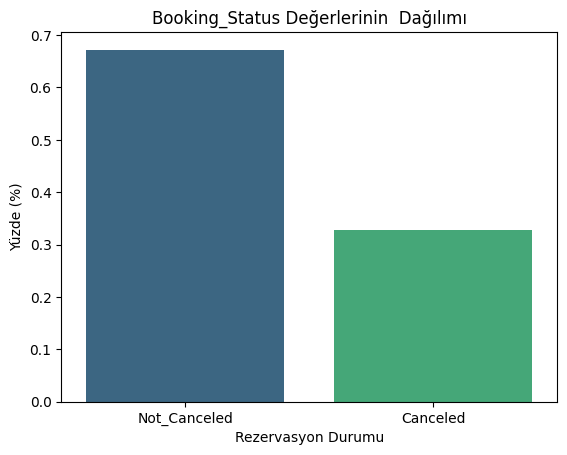

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


In [61]:
value_counts_normalized = df['booking_status'].value_counts(normalize=True)

# Bar grafiğini çizin
sns.barplot(x=value_counts_normalized.index, y=value_counts_normalized.values, palette="viridis")

# Grafiği özelleştirin
plt.title("Booking_Status Değerlerinin  Dağılımı")
plt.xlabel("Rezervasyon Durumu")
plt.ylabel("Yüzde (%)")

# Grafiği gösterin
plt.xticks(rotation=0)  # x ekseni etiketlerini yatayda tutmak için
plt.show()
print(df['booking_status'].value_counts(normalize=False))

---

> Veri setinin sahip olduğu kategorik kırılımlar (*type_of_meal_plan*, *room_type_reserved*, *market_segment_type*,*repeated_guest* ) üzerinden hedef değişkenin incelenmesi:

***type_of-meal_plan***

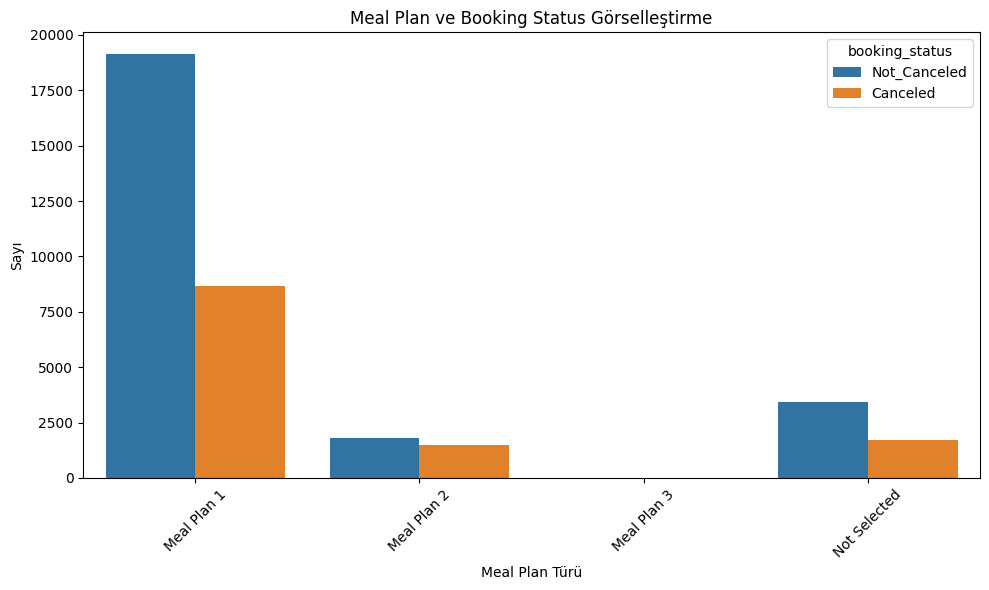

type_of_meal_plan  booking_status
Meal Plan 1        Not_Canceled      19156
                   Canceled           8679
Meal Plan 2        Not_Canceled       1799
                   Canceled           1506
Meal Plan 3        Not_Canceled          4
                   Canceled              1
Not Selected       Not_Canceled       3431
                   Canceled           1699
Name: count, dtype: int64
type_of_meal_plan  booking_status
Meal Plan 1        Not_Canceled      0.688198
                   Canceled          0.311802
Meal Plan 2        Not_Canceled      0.544327
                   Canceled          0.455673
Meal Plan 3        Not_Canceled      0.800000
                   Canceled          0.200000
Not Selected       Not_Canceled      0.668811
                   Canceled          0.331189
Name: proportion, dtype: float64


In [62]:
temp_df_meal = df.groupby(by='type_of_meal_plan')['booking_status'].value_counts()
temp_df_meal_normalized = df.groupby(by='type_of_meal_plan')['booking_status'].value_counts(normalize=True)
# Veriyi DataFrame'e dönüştürülmesi
temp_df_meal1 = temp_df_meal.copy()
temp_df_meal = temp_df_meal.reset_index(name='count')

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_df_meal, x='type_of_meal_plan', y='count', hue='booking_status')
plt.title('Meal Plan ve Booking Status Görselleştirme')
plt.xlabel('Meal Plan Türü')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(temp_df_meal1,end='\n')
print(temp_df_meal_normalized)



> Yemek planı kırılımında rezervasyon durumu incelendiğinde, 1. yemek planının en sık tercih edilen plan olduğu görülmektedir ve rezervasyon iptalinin iptal edilmeme durumuna göre daha düşük geldiği görülmektedir

> meal_plan_2 için se daha az tercih edilmeleri dışında rezervasyon iptali durumu bakımından yarı yarıya bir dağılım söz konusudur. 

> meal_paln_3 ise neredeyse hiç tercih edilmemekle birlikte toplanda yalnızca 5 kişi tarfından seçilmiş olup bu 5 kişiden yalnızca biri rezervasyonunu iptal etmiştir.

> Bir yemek planı seçmemiş kişiler tercih düzeyinde 2. sırada yer almaktadır ve %33 lük bir kesim rezervasyonunu iptal etmiştir.

> Oransal olarak bakıldğından meal_plan_2'yi seçmiş kişilerin rezervasyonunu iptal etmesi daha olası görülmektedir.

---

***room_type_reserved***

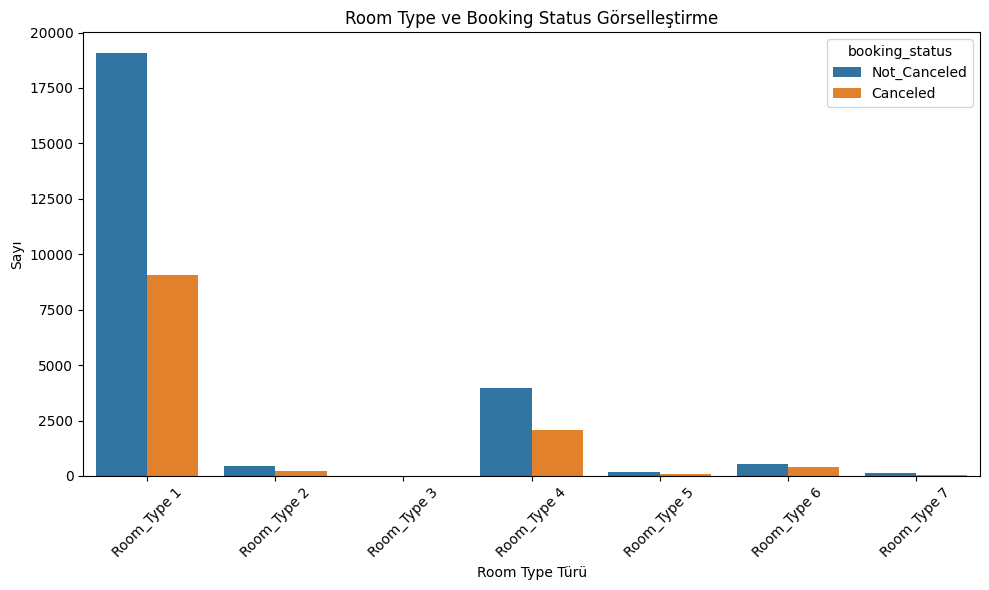

room_type_reserved  booking_status
Room_Type 1         Not_Canceled      19058
                    Canceled           9072
Room_Type 2         Not_Canceled        464
                    Canceled            228
Room_Type 3         Not_Canceled          5
                    Canceled              2
Room_Type 4         Not_Canceled       3988
                    Canceled           2069
Room_Type 5         Not_Canceled        193
                    Canceled             72
Room_Type 6         Not_Canceled        560
                    Canceled            406
Room_Type 7         Not_Canceled        122
                    Canceled             36
Name: count, dtype: int64
room_type_reserved  booking_status
Room_Type 1         Not_Canceled      0.677497
                    Canceled          0.322503
Room_Type 2         Not_Canceled      0.670520
                    Canceled          0.329480
Room_Type 3         Not_Canceled      0.714286
                    Canceled          0.285714
Room_T

In [63]:
temp_df_room = df.groupby(by='room_type_reserved')['booking_status'].value_counts(normalize=False)
temp_df_room_normalized = df.groupby(by='room_type_reserved')['booking_status'].value_counts(normalize=True)

# verinin dataframe'e dönüştürülmesi
temp_df_room1=temp_df_room.copy()
temp_df_room = temp_df_room.reset_index(name='count')

#Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_df_room, x='room_type_reserved', y='count', hue='booking_status')
plt.title('Room Type ve Booking Status Görselleştirme')
plt.xlabel('Room Type Türü')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(temp_df_room1,end='\n')
print(temp_df_room_normalized)

> Yapılan görselleştirme ve sorgular doğrultusunda room_type1 in ağırlıklı olarak tercih edildiğini göstermektedir. Tercih doğrultusunda 2. sırada room_type_4 yer almaktadır ve meal_type özelliğindeki durumun bir benzeri olarak oransal düzeyde farklılıklar görülsede yine rezervasyon iptalinin daha sık görüldüğü bir kategori gözlemlenememiştir.

---

***market_segment_type***

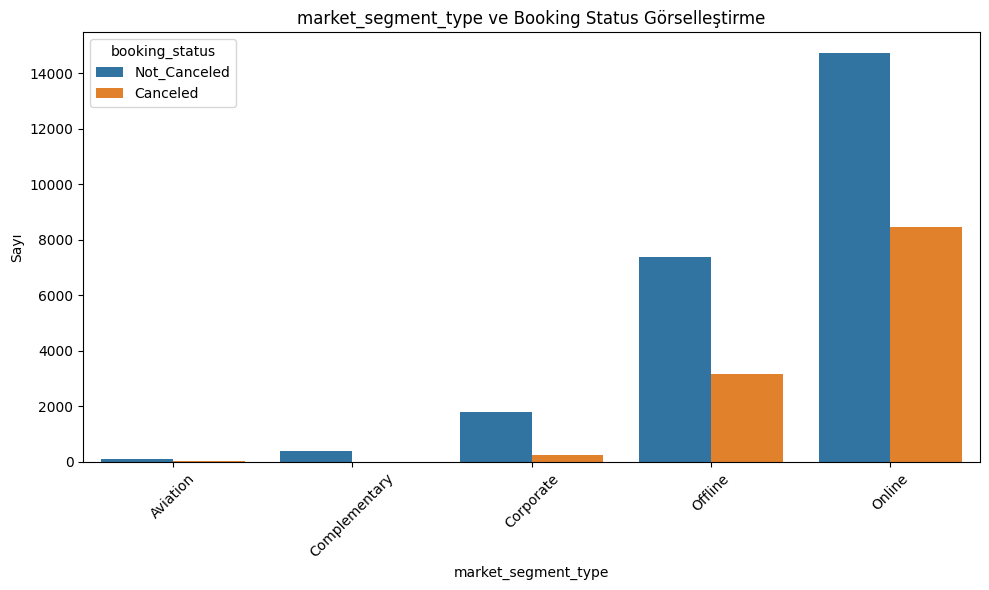

market_segment_type  booking_status
Aviation             Not_Canceled         88
                     Canceled             37
Complementary        Not_Canceled        391
Corporate            Not_Canceled       1797
                     Canceled            220
Offline              Not_Canceled       7375
                     Canceled           3153
Online               Not_Canceled      14739
                     Canceled           8475
Name: count, dtype: int64
market_segment_type  booking_status
Aviation             Not_Canceled      0.704000
                     Canceled          0.296000
Complementary        Not_Canceled      1.000000
Corporate            Not_Canceled      0.890927
                     Canceled          0.109073
Offline              Not_Canceled      0.700513
                     Canceled          0.299487
Online               Not_Canceled      0.634919
                     Canceled          0.365081
Name: proportion, dtype: float64


In [64]:
temp_df_market = df.groupby(by='market_segment_type')['booking_status'].value_counts()
temp_df_market_normalized = df.groupby(by='market_segment_type')['booking_status'].value_counts(normalize=True)
# Veriyi DataFrame'e dönüştürülmesi
temp_df_market1 = temp_df_market.copy()
temp_df_market = temp_df_market.reset_index(name='count')

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_df_market, x='market_segment_type', y='count', hue='booking_status')
plt.title('market_segment_type ve Booking Status Görselleştirme')
plt.xlabel('market_segment_type')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(temp_df_market1,end='\n')
print(temp_df_market_normalized)


> Rezervasyon kanalı ağırlıklı olarak online olduğu gözükmektedir. Aviation ve Oflline booking seçenekleri oransal olarak aynı rezervasyon iptali dağılımına sahiptir. En yüksek rezervasyon iptali oranı ise Online rezervasyon seçeneğine aittir. Diğer kategorik kırılımlarıda gözlemlendiği gibi bu kategoride de rezervasyon iptalinin yüksek olduğu bir seçenek gözlemlenmemiştir.

---

***repeated_guest***

> *repeated_guest* özelliği diğer kırılım kategorilerinden farklı olarak binary bir çıktı oluşturmaktadır. Rezervasyon sahibinin daha önce otelde misafir edilip edilmediğini göstermektedir. Bu özellik ile daha önce misafir edilen müşterilerin ve yeni müşterilerin rezervasyon iptali bakımından davranışları karşılaştırılabilir.

In [65]:
df.groupby(by='repeated_guest')['booking_status'].value_counts()

repeated_guest  booking_status
new_customer    Not_Canceled      23476
                Canceled          11869
old_customer    Not_Canceled        914
                Canceled             16
Name: count, dtype: int64

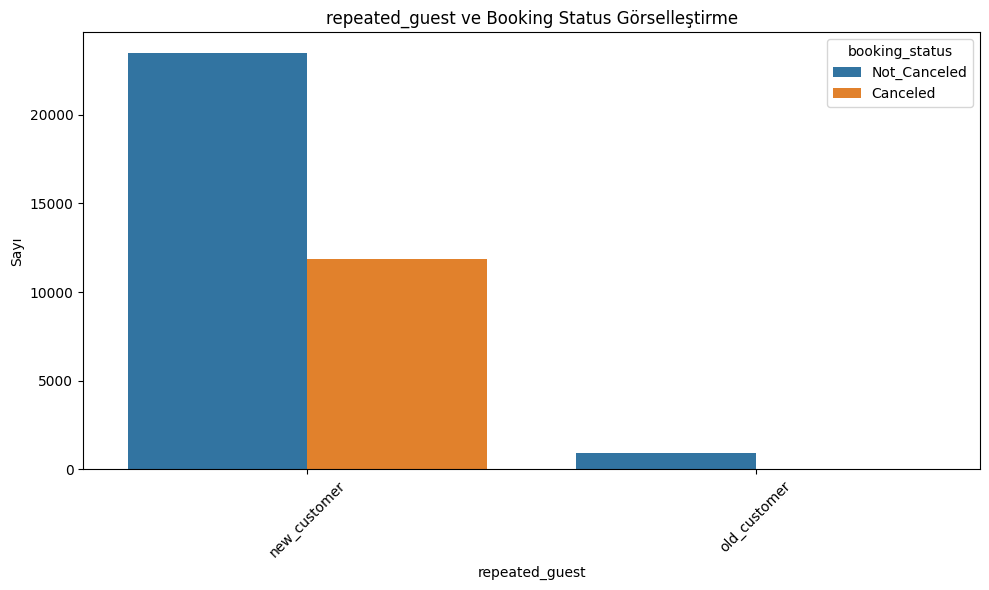

repeated_guest  booking_status
new_customer    Not_Canceled      23476
                Canceled          11869
old_customer    Not_Canceled        914
                Canceled             16
Name: count, dtype: int64
repeated_guest  booking_status
new_customer    Not_Canceled      0.664196
                Canceled          0.335804
old_customer    Not_Canceled      0.982796
                Canceled          0.017204
Name: proportion, dtype: float64


In [66]:
temp_df_rep = df.groupby(by='repeated_guest')['booking_status'].value_counts()
temp_df_rep_normalized = df.groupby(by='repeated_guest')['booking_status'].value_counts(normalize=True)
# Veriyi DataFrame'e dönüştürülmesi
temp_df_rep1 = temp_df_rep.copy()
temp_df_rep = temp_df_rep.reset_index(name='count')

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_df_rep, x='repeated_guest', y='count', hue='booking_status')
plt.title('repeated_guest ve Booking Status Görselleştirme')
plt.xlabel('repeated_guest')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(temp_df_rep1,end='\n')
print(temp_df_rep_normalized)

> Eski müşterilerin rezervasyon iptalleri incelendiğinde %1 lik bir kesimin rezervasyonlarını iptal ettiği görülmektedir ve yeni müşterileride ise bu oran %33.5 dir. Bu durumda sürekli müşterilerin rezervasyonlarını yeni müşterilere göre çok daha az ipral ettirdikleri söylenebilir.

---

#### Değişkenlerin Dağılımlarının İncelenmesi

***Yetişkin Misafirlerin Sayısı (no_of_adults)***

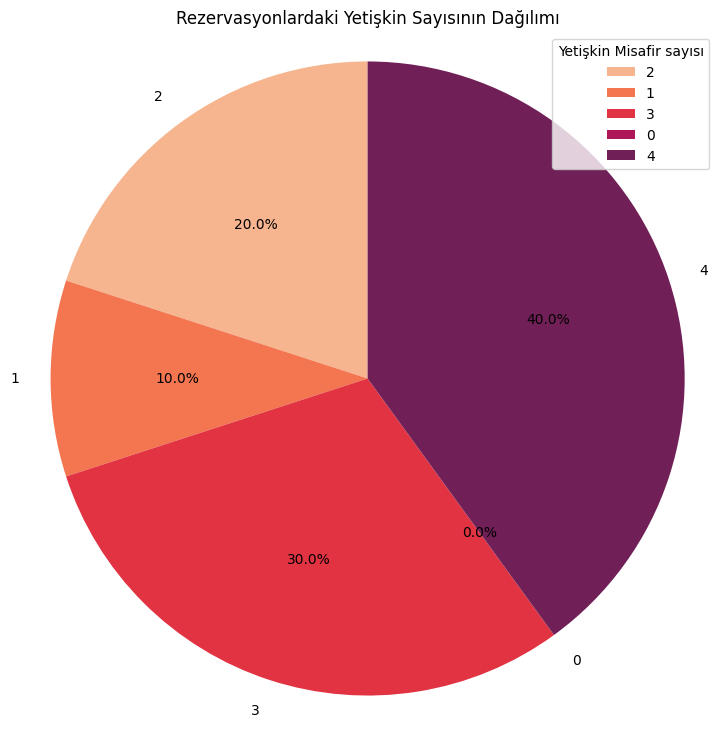

In [67]:
df_temp_adult = df.groupby('no_of_adults')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

custom_palette = sns.color_palette("rocket_r")
fig, ax = plt.subplots(figsize=(9,9))
ax.pie(df_temp_adult['no_of_adults'], labels=df_temp_adult['no_of_adults'].unique(), colors=sns.color_palette("rocket_r"), autopct='%1.1f%%', startangle=90)
ax.axis('equal') 
plt.title('Rezervasyonlardaki Yetişkin Sayısının Dağılımı')  # Başlık ekleyin
plt.legend(df_temp_adult['no_of_adults'], loc="best", title="Yetişkin Misafir sayısı")  # Açıklamaları ekleyin
plt.show()

***Çocuk Misafirlerin Sayısı (no_of_children)***

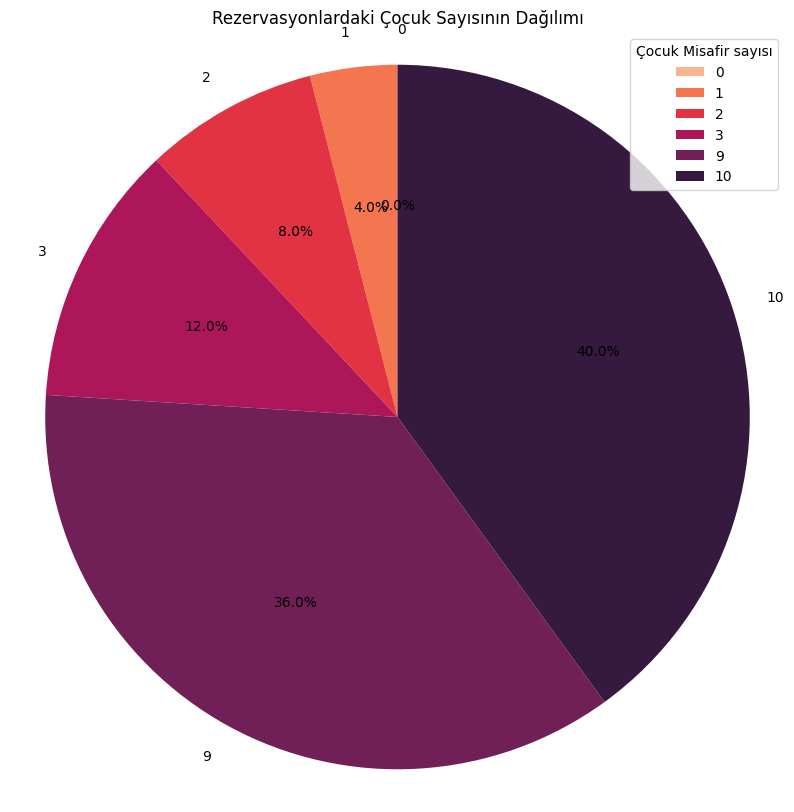

In [68]:
df_temp_children= df.groupby(['no_of_children'])['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

custom_palette = sns.color_palette("rocket_r")
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(df_temp_children['no_of_children'], labels=df_temp_children['no_of_children'].unique(), colors=sns.color_palette("rocket_r"), autopct='%1.1f%%', startangle=90)
ax.axis('equal') 
plt.title('Rezervasyonlardaki Çocuk Sayısının Dağılımı')  # Başlık ekleyin
plt.legend(df_temp_children['no_of_children'], loc="best", title="Çocuk Misafir sayısı")  # Açıklamaları ekleyin
plt.show()

---

***Rezervasyon Yapılan Gece Sayıları (no_of_week_nights, no_of_weekend_night ve no_of_total_nights)***

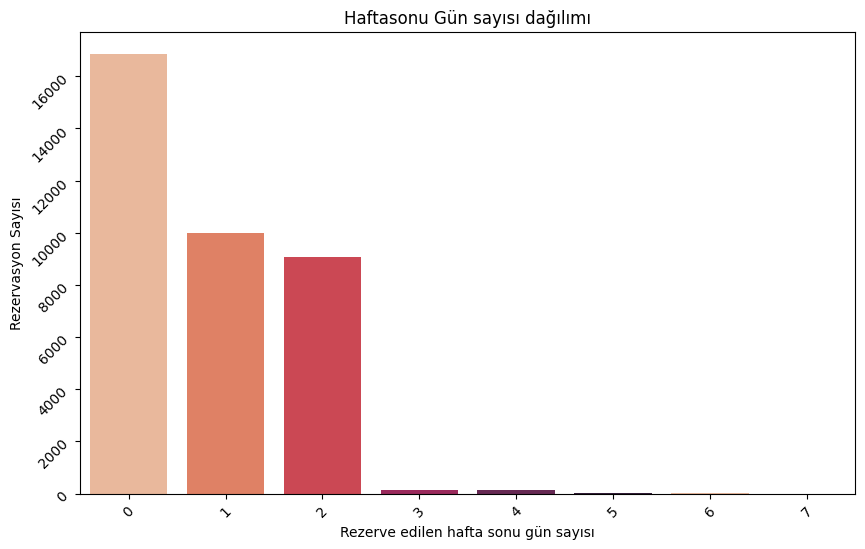

   no_of_weekend_nights  count
0                     0  16872
1                     1   9995
2                     2   9071
3                     3    153
4                     4    129
5                     5     34
6                     6     20
7                     7      1


In [69]:
df_temp_night_w = df.groupby('no_of_weekend_nights')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

custom_palette = sns.color_palette("rocket_r")

plt.figure(figsize=(10,6))
pl1=sns.barplot(x='no_of_weekend_nights', y='count', data=df_temp_night_w, palette=custom_palette)
pl1.set_xlabel('Rezerve edilen hafta sonu gün sayısı')
pl1.set_ylabel('Rezervasyon Sayısı')
pl1.set_title('Haftasonu Gün sayısı dağılımı')
pl1.tick_params(rotation=45)

plt.show()
print(df_temp_night_w.sort_values(by='no_of_weekend_nights',ascending=True))


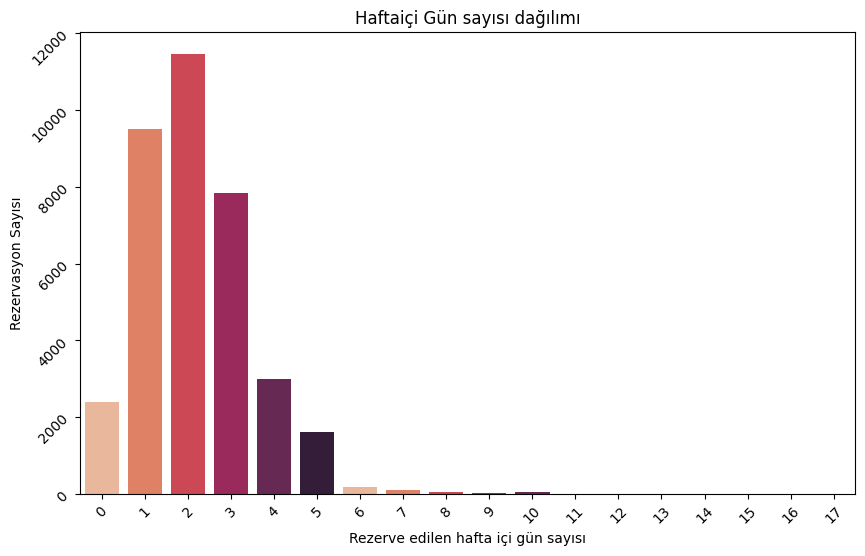

    no_of_week_nights  count
4                   0   2387
1                   1   9488
0                   2  11444
2                   3   7839
3                   4   2990
5                   5   1614
6                   6    189
7                   7    113
9                   8     62
10                  9     34
8                  10     62
11                 11     17
13                 12      9
15                 13      5
14                 14      7
12                 15     10
17                 16      2
16                 17      3


In [70]:
df_temp_night_we = df.groupby('no_of_week_nights')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).reset_index()


custom_palette = sns.color_palette("rocket_r")

plt.figure(figsize=(10,6))
pl1=sns.barplot(x='no_of_week_nights', y='count', data=df_temp_night_we, palette=custom_palette)
pl1.set_xlabel('Rezerve edilen hafta içi gün sayısı')
pl1.set_ylabel('Rezervasyon Sayısı')
pl1.set_title('Haftaiçi Gün sayısı dağılımı')
pl1.tick_params(rotation=45)

plt.show()
print(df_temp_night_we.sort_values(by='no_of_week_nights' ,ascending=True))

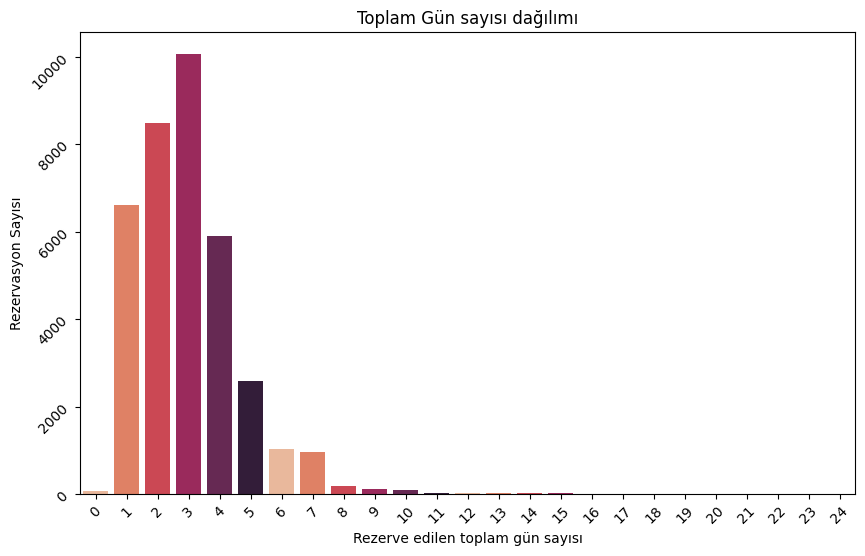

    no_of_total_nights  count
10                   0     78
2                    1   6604
1                    2   8472
0                    3  10052
3                    4   5893
4                    5   2589
5                    6   1031
6                    7    973
7                    8    179
8                    9    111
9                   10    109
11                  11     39
14                  12     24
15                  13     18
12                  14     32
13                  15     31
17                  16      6
19                  17      5
21                  18      3
18                  19      6
16                  20     11
20                  21      4
22                  22      2
23                  23      2
24                  24      1


In [71]:
df_temp_night_t = df.groupby('no_of_total_nights')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

custom_palette = sns.color_palette("rocket_r")

plt.figure(figsize=(10,6))
pl1=sns.barplot(x='no_of_total_nights', y='count', data=df_temp_night_t, palette=custom_palette)
pl1.set_xlabel('Rezerve edilen toplam gün sayısı')
pl1.set_ylabel('Rezervasyon Sayısı')
pl1.set_title('Toplam Gün sayısı dağılımı')
pl1.tick_params(rotation=45)

plt.show()
print(df_temp_night_t.sort_values(by='no_of_total_nights' ,ascending=True))

> Yapı itibariyle sağa çarpık normal dağılım görülmektedir.

---

***Yemek Planı (Meal_Plan)***

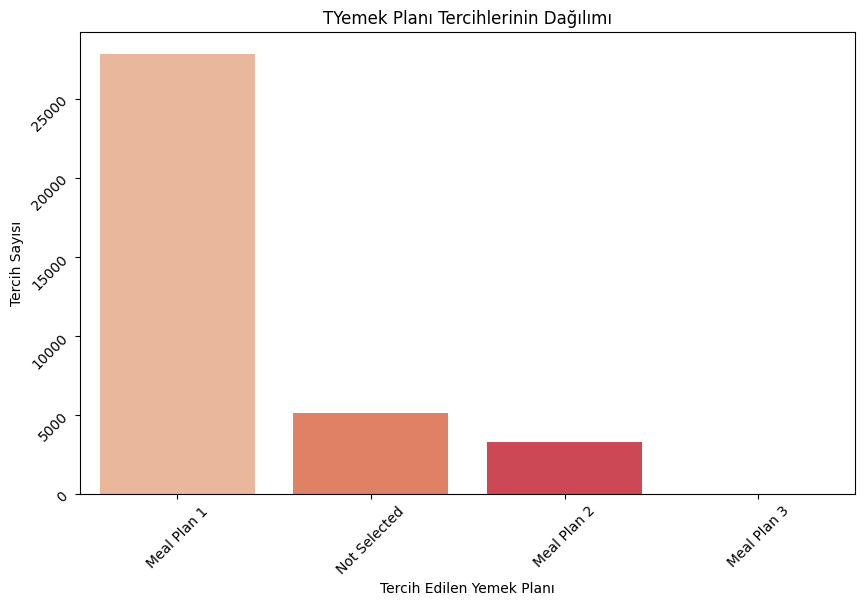

  type_of_meal_plan  count
0       Meal Plan 1  27835
2       Meal Plan 2   3305
3       Meal Plan 3      5
1      Not Selected   5130


In [72]:
df_temp_meal = df.groupby('type_of_meal_plan')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

custom_palette = sns.color_palette("rocket_r")

plt.figure(figsize=(10,6))
pl1=sns.barplot(x='type_of_meal_plan', y='count', data=df_temp_meal, palette=custom_palette)
pl1.set_xlabel('Tercih Edilen Yemek Planı')
pl1.set_ylabel('Tercih Sayısı')
pl1.set_title('TYemek Planı Tercihlerinin Dağılımı')
pl1.tick_params(rotation=45)

plt.show()
print(df_temp_meal.sort_values(by='type_of_meal_plan' ,ascending=True))

---

***Oda Tipi (room_type)***

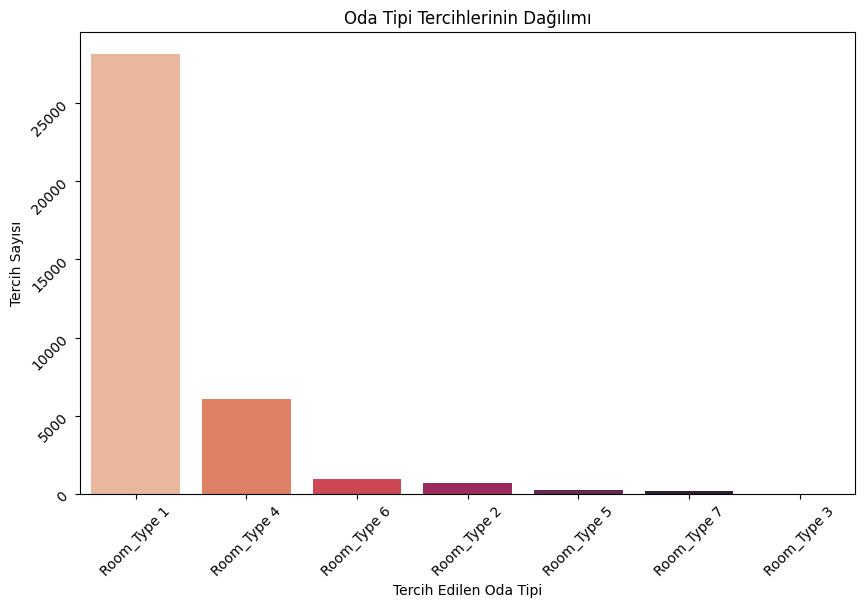

  room_type_reserved  count
0        Room_Type 1  28130
3        Room_Type 2    692
6        Room_Type 3      7
1        Room_Type 4   6057
4        Room_Type 5    265
2        Room_Type 6    966
5        Room_Type 7    158


In [73]:
df_temp_room = df.groupby('room_type_reserved')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

custom_palette = sns.color_palette("rocket_r")

plt.figure(figsize=(10,6))
pl1=sns.barplot(x='room_type_reserved', y='count', data=df_temp_room, palette=custom_palette)
pl1.set_xlabel('Tercih Edilen Oda Tipi')
pl1.set_ylabel('Tercih Sayısı')
pl1.set_title('Oda Tipi Tercihlerinin Dağılımı')
pl1.tick_params(rotation=45)

plt.show()
print(df_temp_room.sort_values(by='room_type_reserved' ,ascending=True))

> Değişkenler dağılımları üzerine incelendiğinde genel olarak tek bir seçenek üzerende baskınlık gözlemlenmiştir. Bu durum veri yapısındaki dengesizliği göstermektedir.

---

***Özel İstekler (no_of_special_requests)***

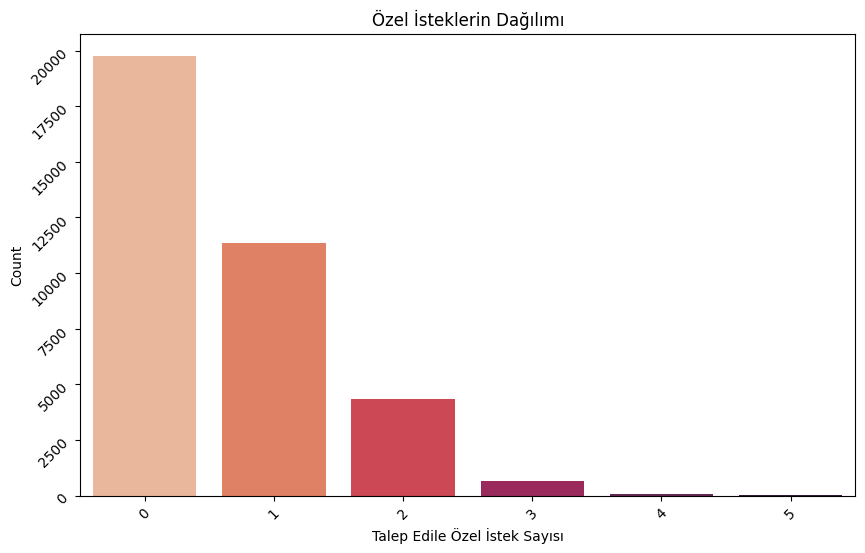

   no_of_special_requests  count
0                       0  19777
1                       1  11373
2                       2   4364
3                       3    675
4                       4     78
5                       5      8


In [74]:
df_temp_spec = df.groupby('no_of_special_requests')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).reset_index()

custom_palette = sns.color_palette("rocket_r")

plt.figure(figsize=(10,6))
pl1=sns.barplot(x='no_of_special_requests', y='count', data=df_temp_spec, palette=custom_palette)
pl1.set_xlabel('Talep Edile Özel İstek Sayısı')
pl1.set_ylabel('Count')
pl1.set_title('Özel İsteklerin Dağılımı')
pl1.tick_params(rotation=45)

plt.show()
print(df_temp_spec.sort_values(by='no_of_special_requests' ,ascending=True))

---

#### Zaman Bakımından Verilerin İncelenmesi

> Otel rezervasyonlarındaki değişimin zaman serisi olarak incelenmesi mevsimsellikler ve trendler hakkında önemli bilgiler içerebilir. Ayrıca 2017 ve 2018 yılları arasındaki farklılıkların gözlemlenebilmesi için iyi bir seçenektir.

In [75]:
# Zaman serisi olarak yapılacak olan inceleme veri seti üzerinde değişiklik gerektirebilir.
# Bu sebepten ötürü zaman serisi incelemesi yapılırken kullanmak için ayrı bir DataFrame oluşturuldu.

df_ts = df.copy()
df_ts.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,no_of_total_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,...,arrival_month,arrival_datetime,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,3,Meal Plan 1,0,Room_Type 1,224,...,10,2017-10-02,2,Offline,new_customer,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,5,Not Selected,0,Room_Type 1,5,...,11,2018-11-06,6,Online,new_customer,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,3,Meal Plan 1,0,Room_Type 1,1,...,2,2018-02-28,28,Online,new_customer,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,2,Meal Plan 1,0,Room_Type 1,211,...,5,2018-05-20,20,Online,new_customer,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,2,Not Selected,0,Room_Type 1,48,...,4,2018-04-11,11,Online,new_customer,0,0,94.50,0,Canceled


In [76]:
df_ts['arrival_datetime'] = pd.to_datetime(df_ts['arrival_datetime'])

# repeated_guest int çevirisi (daha önceden object olarak dönüştürüldü ama burada int olarak 0 ve 1 olacak şekilde ayarlanmalı)
df_ts['repeated_guest'] = df_ts['repeated_guest'].replace({'new_customer': 0,'old_customer': 1})
df_ts.dtypes

Booking_ID                                      object
no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
no_of_total_nights                               int64
type_of_meal_plan                               object
required_car_parking_space                       int64
room_type_reserved                              object
lead_time                                        int64
arrival_year                                     int64
arrival_month                                    int64
arrival_datetime                        datetime64[ns]
arrival_date                                     int64
market_segment_type                             object
repeated_guest                                   int64
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_

In [77]:
df_ts = df_ts.set_index('arrival_datetime')
df_ts.index

DatetimeIndex(['2017-10-02', '2018-11-06', '2018-02-28', '2018-05-20',
               '2018-04-11', '2018-09-13', '2017-10-15', '2018-12-26',
               '2018-07-06', '2018-10-18',
               ...
               '2018-05-30', '2018-03-04', '2018-07-11', '2018-11-01',
               '2018-10-06', '2018-08-03', '2018-10-17', '2018-07-01',
               '2018-04-21', '2018-12-30'],
              dtype='datetime64[ns]', name='arrival_datetime', length=36275, freq=None)

In [78]:
# Verilerin aylık olarak incelenmesi için aylık olarak bir yeniden örnekleme yapılması gerekli.
num_cols_ts = df_ts.select_dtypes(include=['float64','int64'])
ts_cols = num_cols_ts.columns.tolist()

# Aylık olarak verinin resample edilmesi
df_ts_m = df_ts[ts_cols].resample('M').sum()

# Her bir aylık dönemin veri sayısını almak
data_counts = df_ts.resample('M').count()

# Aylık dönemlerin veri sayısını içeren bir sütun eklemek
df_ts_m['Data_Count'] = data_counts['Booking_ID']

df_ts_m = df_ts_m.drop(['arrival_year','arrival_month','arrival_date','avg_price_per_room'],axis=1)
df_ts_m['Month'] = df_ts_m.index.month
df_ts_m['Year'] = df_ts_m.index.year
df_ts_m["Date_MonthYear"] = df_ts_m.index.strftime("%b-%Y")
df_ts_m["Date_MonthYear"] = pd.to_datetime(df_ts_m["Date_MonthYear"], format="%b-%Y")
df_ts_m["Date_MonthYear"] = df_ts_m["Date_MonthYear"].dt.to_period('M')
df_ts_m = df_ts_m[['Date_MonthYear','Month', 'Year','Data_Count'] + [col for col in df_ts_m.columns if col not in ['Month', 'Year','Date_MonthYear','Data_Count']]]


In [79]:
df_ts_m.head()

,Date_MonthYear,Month,Year,Data_Count,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,no_of_total_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests
arrival_datetime,,,,,,,,,,,,,,,
2017-07-31,2017-07,7,2017,363,659,11,351,845,1196,1,53353,0,0,0,113
2017-08-31,2017-08,8,2017,1014,1882,145,825,2116,2941,43,42842,9,3,12,667
2017-09-30,2017-09,9,2017,1649,2895,79,1019,3418,4437,19,93486,39,25,35,889
2017-10-31,2017-10,10,2017,1913,3278,97,1316,3835,5151,27,126740,74,63,68,939
2017-11-30,2017-11,11,2017,647,1059,14,386,1366,1752,20,22273,34,14,116,369


In [80]:
df_ts_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2017-07-31 to 2018-12-31
Freq: M
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype    
---  ------                                --------------  -----    
 0   Date_MonthYear                        18 non-null     period[M]
 1   Month                                 18 non-null     int32    
 2   Year                                  18 non-null     int32    
 3   Data_Count                            18 non-null     int64    
 4   no_of_adults                          18 non-null     int64    
 5   no_of_children                        18 non-null     int64    
 6   no_of_weekend_nights                  18 non-null     int64    
 7   no_of_week_nights                     18 non-null     int64    
 8   no_of_total_nights                    18 non-null     int64    
 9   required_car_parking_space            18 non-null     int64    
 10  lead_time                           

##### Aylara Göre Yetişkin ve Çocuk Misafir Sayılarındaki Değişim

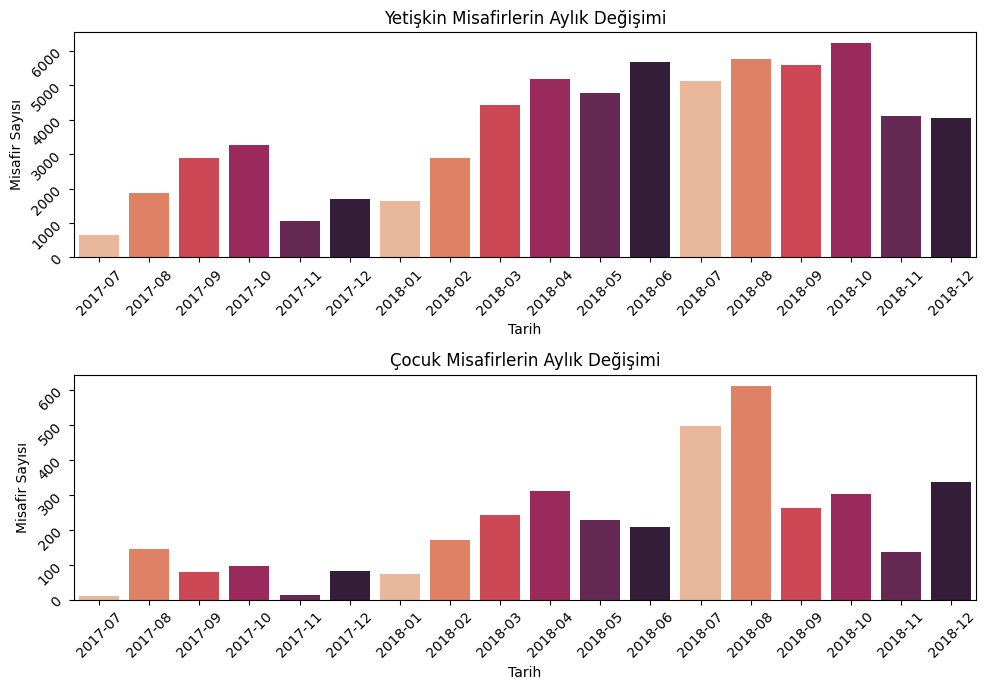

In [81]:

# Özelleştirilmiş renk paletini ayarlama
custom_palette = sns.color_palette("rocket_r")

# İki subplot oluşturma
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

# İlk çubuk grafiği
sns.barplot(x='Date_MonthYear', y='no_of_adults', data=df_ts_m, palette=custom_palette, ax=ax1)
ax1.set_xlabel('Tarih')
ax1.set_ylabel('Misafir Sayısı')
ax1.set_title('Yetişkin Misafirlerin Aylık Değişimi')
ax1.tick_params(rotation=45)

# İkinci çubuk grafiği
sns.barplot(x='Date_MonthYear', y='no_of_children', data=df_ts_m, palette=custom_palette, ax=ax2)
ax2.set_xlabel('Tarih')
ax2.set_ylabel('Misafir Sayısı')
ax2.set_title('Çocuk Misafirlerin Aylık Değişimi')
ax2.tick_params(rotation=45)

# Otomatik yatay boşluk ayarlama
plt.tight_layout()
# Görseli gösterme
plt.show()


> Yetişkin misafirlerin sayısı ve çocuk misafirlerin sayısı benzer dağılım karakteristiklerine sahip olup zaman bazında benzer değişim göstermişlerdir. Benzer mevsimsellik ve trend izlenimi vardır.

##### Aylara Göre Rezervasyon Sayısındaki Değişim

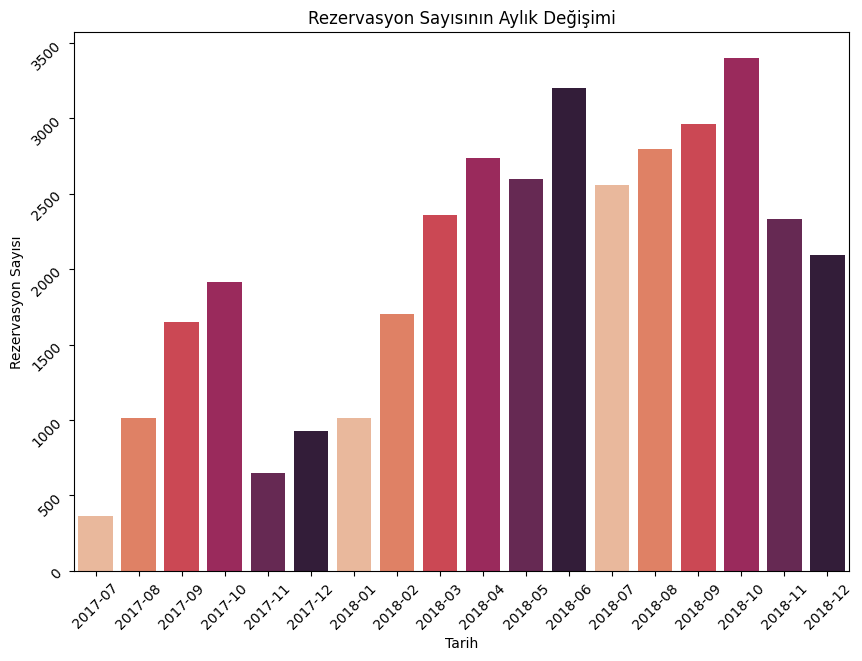

In [83]:
# Özelleştirilmiş renk paletini ayarlama
custom_palette = sns.color_palette("rocket_r")

plt.figure(figsize=(10,7))
pl1=sns.barplot(x='Date_MonthYear', y='Data_Count', data=df_ts_m, palette=custom_palette)
pl1.set_xlabel('Tarih')
pl1.set_ylabel('Rezervasyon Sayısı')
pl1.set_title('Rezervasyon Sayısının Aylık Değişimi')
pl1.tick_params(rotation=45)



> Rezervasyon sayısındaki zaman bağlı aylık değişim mevsimsellik ve yükseliş trendi göstermektedir. 2017 ve 2018 yılının karşılaştırılması trendin varlığına, sıcak ve soğuk aylardaki değişim ise mevsimsellik durumunun varlığına işarettir.

##### Aylık olarak ağırlanan eski müşterilerin sayısı

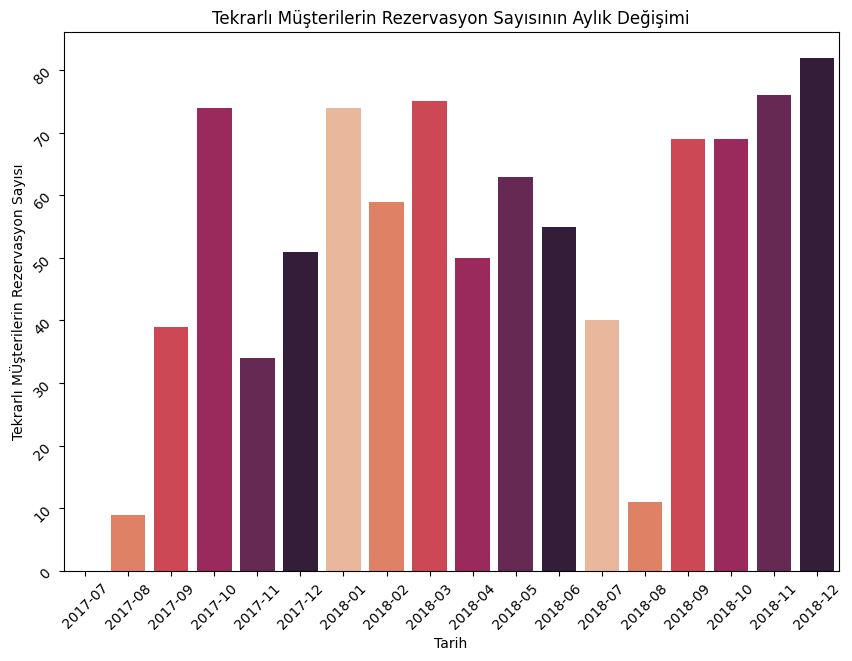

In [84]:
custom_palette = sns.color_palette("rocket_r")

plt.figure(figsize=(10,7))
pl1=sns.barplot(x='Date_MonthYear', y='repeated_guest', data=df_ts_m, palette=custom_palette)
pl1.set_xlabel('Tarih')
pl1.set_ylabel('Tekrarlı MÜşterilerin Rezervasyon Sayısı')
pl1.set_title('Tekrarlı Müşterilerin Rezervasyon Sayısının Aylık Değişimi')
pl1.tick_params(rotation=45)

> Eski müşterilerin artış verdiği ayların rezervasyon sayısı bakımından düşük aylar olması farklı bir bilgi barındırmaktadır. 2017 ve 2018 yıllarının Ağustos aylarında dip seviye görmesi mevsimsellik göstergesi olabilir.

---

#### Korelasyon

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   no_of_total_nights                    36275 non-null  int64  
 6   type_of_meal_plan                     36275 non-null  object 
 7   required_car_parking_space            36275 non-null  int64  
 8   room_type_reserved                    36275 non-null  object 
 9   lead_time                             36275 non-null  int64  
 10  arrival_year                          36275 non-null  int64  
 11  arrival_month  

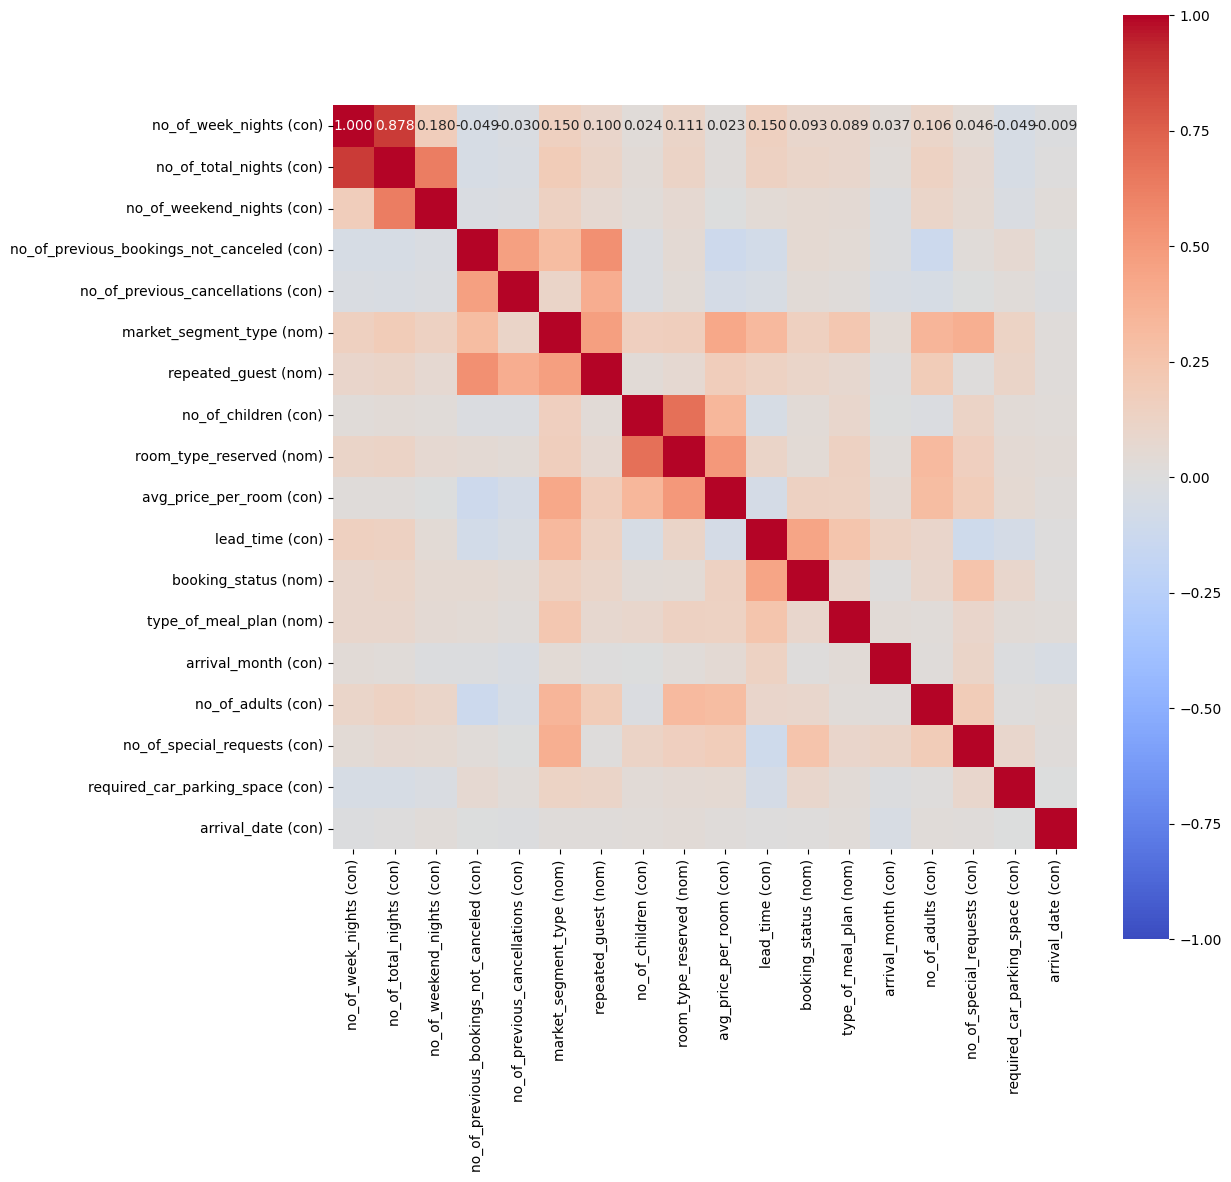

In [86]:
cor_df = df.drop(['Booking_ID','arrival_datetime','arrival_year'],axis=1)
nom_cols = identify_nominal_columns(cor_df)
assoc = associations(dataset=cor_df, 
             nominal_columns=nom_cols,
             mark_columns=True,
             nom_nom_assoc='cramer',
             nom_num_assoc='correlation_ratio',
             num_num_assoc='pearson',
             cramers_v_bias_correction=False,
             annot=True,
             cmap='coolwarm',
             sv_color='silver',
             cbar=True,
             plot=True,
             clustering=True,
             multiprocessing=True,max_cpu_cores= 4,
             nan_replace_value=0,
             nan_strategy='replace',
             figsize=(12,12),
             fmt='.3f',
             symmetric_nom_nom=True,
             symmetric_num_num=True
             )

> Isı haritası incelendiğinde hedef değişken ile ilişkili olabilecek ve tahmin modeli içerisinde yer alması düşünülen özellikler:

week_nights

weekend_nights

market_segment_type

repeated_guests

room_type_reserved

avg_price_per_room

lead_time *

type_of_meal_plan

arrival_month

no_of_special_requests

required-parking_space

---

### Verinin Modellenmesi

In [87]:
import time
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from joblib import Parallel, delayed, parallel_backend

In [88]:
ml_df = df.drop(['Booking_ID','arrival_year','arrival_datetime','arrival_date'],axis=1)
ml_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,no_of_total_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,3,Meal Plan 1,0,Room_Type 1,224,10,Offline,new_customer,0,0,65.00,0,Not_Canceled
1,2,0,2,3,5,Not Selected,0,Room_Type 1,5,11,Online,new_customer,0,0,106.68,1,Not_Canceled
2,1,0,2,1,3,Meal Plan 1,0,Room_Type 1,1,2,Online,new_customer,0,0,60.00,0,Canceled
3,2,0,0,2,2,Meal Plan 1,0,Room_Type 1,211,5,Online,new_customer,0,0,100.00,0,Canceled
4,2,0,1,1,2,Not Selected,0,Room_Type 1,48,4,Online,new_customer,0,0,94.50,0,Canceled


In [89]:
X = ml_df.drop('booking_status',axis=1)
y= ml_df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)

#Catboost encode işlemi gerektirmediğinden onun kullanacağı verinin bir kopyası bu aşamada oluşturulur
X_train_cat =X_train.copy()
X_test_cat =X_test.copy()

In [90]:
# Nominal özelliklerin belirlenmesi
nom_features = identify_nominal_columns(X)

#label encoder kullanılarak nominal özelliklerin dönüştürülmesi
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
for var in nom_features:
    X_train[var] = label_encoder.fit_transform(X_train[var])
    X_test[var] = label_encoder.fit_transform(X_test[var])

#### Logistik Regresyon

Best hyperparameters: {'max_features': 0.5, 'max_samples': 3000, 'n_estimators': 350}
Accuracy: 0.7630611709110002
Precision: 0.749009448338921
Recall: 0.9688547210723438
F1-Score: 0.8448646325741297


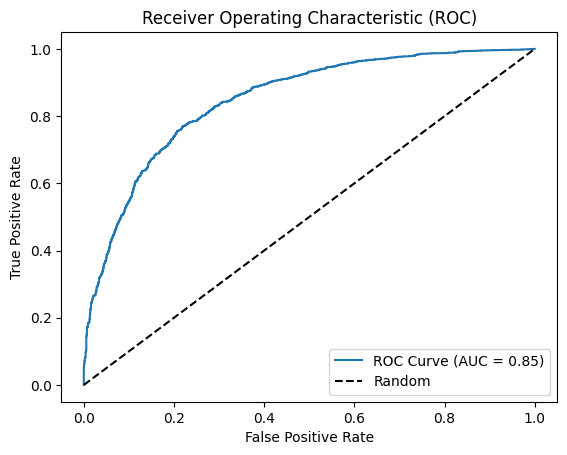

In [91]:
start_time = time.time()
params_lr = {
    'n_estimators': [250,350],
    'max_features': [0.5,1],  
    'max_samples': [3000,5000]  
}

with parallel_backend('loky'):
    bc_lr = GridSearchCV( BaggingClassifier(LogisticRegression(solver='liblinear'), bootstrap=True), params_lr,n_jobs=-1)
    bc_lr.fit(X_train,y_train)   
    print('Best hyperparameters:', bc_lr.best_params_)
    y_lr_pred = bc_lr.predict(X_test)
    # Accuracy
    accuracy = accuracy_score(y_test, y_lr_pred)
    print("Accuracy:", accuracy)
    lr1=accuracy

    # Precision
    precision = precision_score(y_test, y_lr_pred)
    print("Precision:", precision)
    lr2=precision

    # Recall
    recall = recall_score(y_test, y_lr_pred)
    print("Recall:", recall)
    lr3=recall

    # F1-Score
    f1 = f1_score(y_test, y_lr_pred)
    lr4=f1

    print("F1-Score:", f1)

    from sklearn.metrics import roc_curve, auc

    # Modelin tahminleri
    y_lr_pred = bc_lr.predict_proba(X_test)[:, 1]

    # ROC eğrisi için false positive oranı (FPR), true positive oranı (TPR) ve eşik değerlerini hesaplayın
    fpr, tpr, thresholds = roc_curve(y_test, y_lr_pred)

    # ROC eğrisini çizin
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    end_time= time.time()
    lr5 = end_time-start_time

#### Support Vector Machines

Best hyperparameters: {'max_samples': 3000, 'n_estimators': 100}
Accuracy: 0.7658177999474928
Precision: 0.7662295612757002
Recall: 0.9329785136999803
F1-Score: 0.8414222222222223


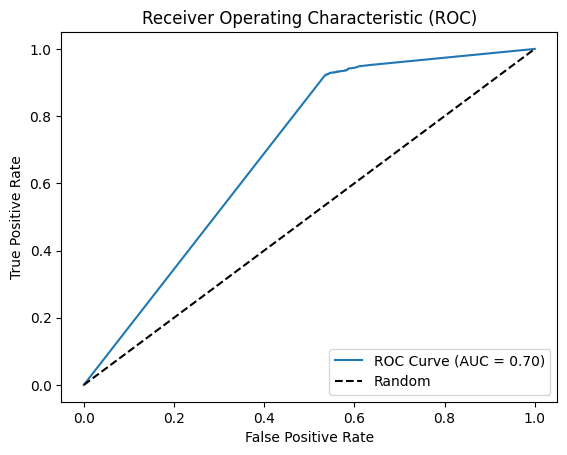

In [92]:
start_time = time.time()
with parallel_backend('loky'):
    params_svm = {
    'n_estimators':[100],
    'max_samples': [3000]
    }
    bc_svm = GridSearchCV(BaggingClassifier(SVC(kernel='rbf', probability=False, max_iter=1000,C=0.1,gamma='scale')),params_svm,n_jobs=-1,cv=2)

    bc_svm.fit(X_train, y_train)

    print('Best hyperparameters:', bc_svm.best_params_)
    y_svm_pred = bc_svm.predict(X_test)
    # Accuracy
    accuracy = accuracy_score(y_test, y_svm_pred)
    print("Accuracy:", accuracy)
    svm1 = accuracy
    
    # Precision
    precision = precision_score(y_test, y_svm_pred)
    print("Precision:", precision)
    svm2 = precision

    # Recall
    recall = recall_score(y_test, y_svm_pred)
    print("Recall:", recall)
    svm3 = recall

    # F1-Score
    f1 = f1_score(y_test, y_svm_pred)
    print("F1-Score:", f1)
    svm4 = f1
    
    #Tahmin değerlerinin elde edilmesi
    y_svm_pred = bc_svm.predict_proba(X_test)[:, 1]

    # ROC eğrisi için false positive oranı (FPR), true positive oranı (TPR) ve eşik değerlerini hesaplayın
    fpr, tpr, thresholds = roc_curve(y_test, y_svm_pred)

    # ROC eğrisini çizin
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    end_time= time.time()
    svm5 = end_time-start_time

#### Random Forest

Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 250}
Accuracy: 0.8495668154371226
Precision: 0.885983880479654
Recall: 0.8884289375123201
F1-Score: 0.8872047244094489


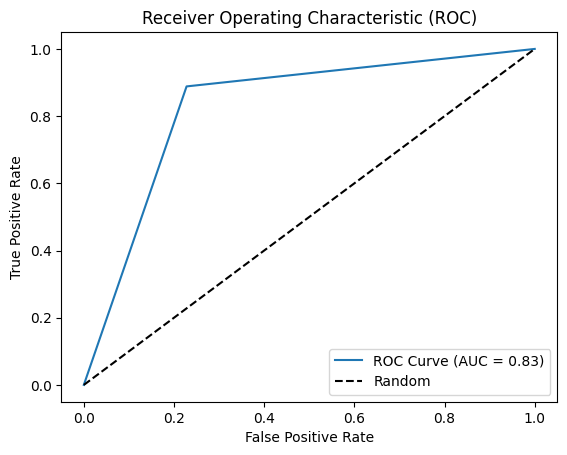

In [94]:
start_time = time.time()
params_rf = {'n_estimators':[250,300],'max_depth':[5,6],'min_samples_split':[3,4],'min_samples_leaf':[2,3]}

with parallel_backend('loky'):
    rand_for = GridSearchCV(RandomForestClassifier(
            max_features=0.75,max_samples=5000,bootstrap=True,criterion='gini',class_weight='balanced_subsample'
        ),params_rf,n_jobs=-1
    )
    rand_for.fit(X_train,y_train)

    print('Best Hyperparameters:',rand_for.best_params_)

    y_rf_pred = rand_for.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_rf_pred)
    print("Accuracy:", accuracy)
    rf1 = accuracy

    # Precision
    precision = precision_score(y_test, y_rf_pred)
    print("Precision:", precision)
    rf2 = precision

    # Recall
    recall = recall_score(y_test, y_rf_pred)
    print("Recall:", recall)
    rf3 = recall

    # F1-Score
    f1 = f1_score(y_test, y_rf_pred)
    print("F1-Score:", f1)
    rf4 = f1
    
    # Modelin tahminleri
    y_pred = rand_for.predict_proba(X_test)[:, 1]

    # ROC eğrisi için false positive oranı (FPR), true positive oranı (TPR) ve eşik değerlerini hesaplayın
    fpr, tpr, thresholds = roc_curve(y_test, y_rf_pred)

    # ROC eğrisini çizin
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    end_time= time.time()
    rf5 = end_time-start_time

#### AdaBoost

Best Hyperparameters: {'learning_rate': 1.25, 'n_estimators': 300}
Accuracy: 0.8317143607245996
Precision: 0.8543653019255936
Recall: 0.9008476246796767
F1-Score: 0.8769909806179237


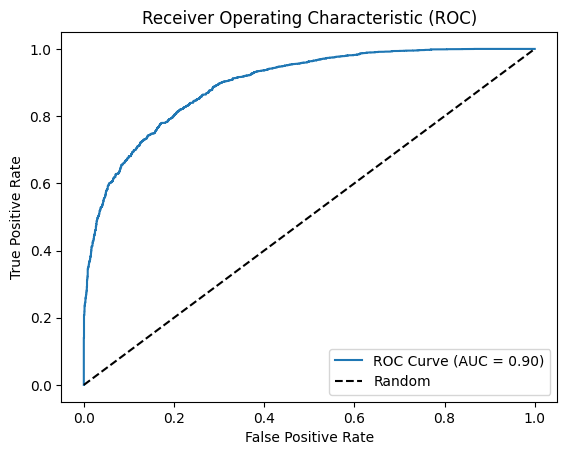

In [95]:
start_time = time.time()
params_ada = {'n_estimators':[250,300],'learning_rate':[0.75,1,1.25]}

with parallel_backend('loky'):
    ada_clf=GridSearchCV(AdaBoostClassifier(random_state=42),params_ada,n_jobs=-1,)
    ada_clf.fit(X_train,y_train)
    print('Best Hyperparameters:',ada_clf.best_params_)

    y_ada_pred = ada_clf.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_ada_pred)
    print("Accuracy:", accuracy)
    ada1 = accuracy

    # Precision
    precision = precision_score(y_test, y_ada_pred)
    print("Precision:", precision)
    ada2 = precision
    # Recall
    recall = recall_score(y_test, y_ada_pred)
    print("Recall:", recall)
    ada3 = recall

    # F1-Score
    f1 = f1_score(y_test, y_ada_pred)
    print("F1-Score:", f1)
    ada4 = f1
    
    # Modelin tahminleri
    y_ada_pred = ada_clf.predict_proba(X_test)[:, 1]

    # ROC eğrisi için false positive oranı (FPR), true positive oranı (TPR) ve eşik değerlerini hesaplayın
    fpr, tpr, thresholds = roc_curve(y_test, y_ada_pred)

    # ROC eğrisini çizin
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    end_time= time.time()
    ada5 = end_time-start_time

#### XGBoost

Best Hyperparameters: {'learning_rate': 0.75, 'n_estimators': 300}
Accuracy: 0.8922289314780782
Precision: 0.9141020646669263
Recall: 0.9250936329588015
F1-Score: 0.9195650044087391


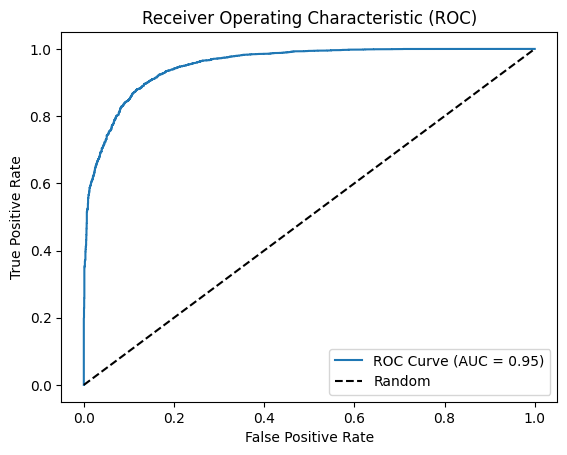

In [96]:
start_time = time.time()
params_xg={'n_estimators':[250,300],'learning_rate':[0.75,1,1.25]}

with parallel_backend('loky'):
    xg_clf = GridSearchCV(XGBClassifier(random_state=42),params_xg,n_jobs=-1)
    xg_clf.fit(X_train,y_train)
    print('Best Hyperparameters:',xg_clf.best_params_)

    y_xg_pred=xg_clf.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_xg_pred)
    print("Accuracy:", accuracy)
    xg1 = accuracy

    # Precision
    precision = precision_score(y_test, y_xg_pred)
    print("Precision:", precision)
    xg2 = precision

    # Recall
    recall = recall_score(y_test, y_xg_pred)
    print("Recall:", recall)
    xg3 = recall

    # F1-Score
    f1 = f1_score(y_test, y_xg_pred)
    print("F1-Score:", f1)
    xg4 = f1
    
    # Modelin tahminleri
    y_xg_pred = xg_clf.predict_proba(X_test)[:, 1]

    # ROC eğrisi için false positive oranı (FPR), true positive oranı (TPR) ve eşik değerlerini hesaplayın
    fpr, tpr, thresholds = roc_curve(y_test, y_xg_pred)

    # ROC eğrisini çizin
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    end_time= time.time()
    xg5 = end_time-start_time

#### CatBoost

In [97]:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X,y, test_size=0.25, random_state=42)


for var in nom_features:
    X_cat_train[var] = label_encoder.fit_transform(X_cat_train[var])
    X_cat_test[var] = label_encoder.fit_transform(X_cat_test[var])

y_cat_train = label_encoder.fit_transform(y_cat_train)
y_cat_test = label_encoder.fit_transform(y_cat_test)

0:	learn: 0.4564405	total: 10.8ms	remaining: 2.7s
1:	learn: 0.3976467	total: 21ms	remaining: 2.6s
2:	learn: 0.3779910	total: 32.9ms	remaining: 2.71s
3:	learn: 0.3692354	total: 44.1ms	remaining: 2.71s
4:	learn: 0.3599757	total: 54.2ms	remaining: 2.66s
5:	learn: 0.3481141	total: 64.8ms	remaining: 2.64s
6:	learn: 0.3439486	total: 75.1ms	remaining: 2.6s
7:	learn: 0.3373315	total: 86.5ms	remaining: 2.62s
8:	learn: 0.3343564	total: 97.7ms	remaining: 2.62s
9:	learn: 0.3300860	total: 109ms	remaining: 2.63s
10:	learn: 0.3283139	total: 120ms	remaining: 2.6s
11:	learn: 0.3256280	total: 129ms	remaining: 2.56s
12:	learn: 0.3220376	total: 139ms	remaining: 2.54s
13:	learn: 0.3191779	total: 150ms	remaining: 2.53s
14:	learn: 0.3153577	total: 162ms	remaining: 2.53s
15:	learn: 0.3131078	total: 172ms	remaining: 2.51s
16:	learn: 0.3117278	total: 182ms	remaining: 2.49s
17:	learn: 0.3099842	total: 192ms	remaining: 2.48s
18:	learn: 0.3048796	total: 203ms	remaining: 2.46s
19:	learn: 0.3031546	total: 213ms	rema

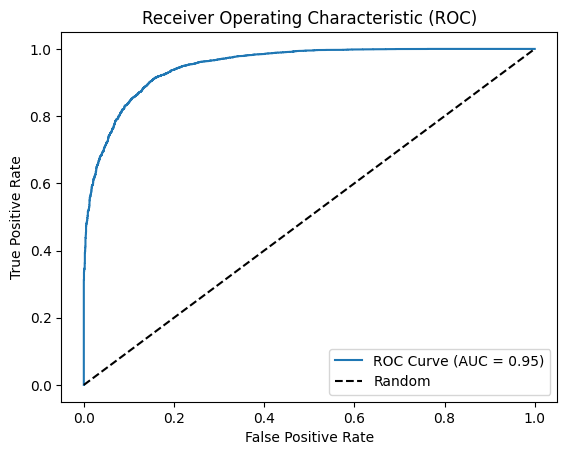

In [104]:
start_time = time.time()

params_cat =  {
    'iterations': [250,300],
    'depth': [4,6],
    'learning_rate': [0.5,0.75]
}

with parallel_backend('loky'):
    cat_clf = GridSearchCV(CatBoostClassifier(random_state=42,loss_function='Logloss'),params_cat,n_jobs=-1,cv=2)
    cat_clf.fit(X_cat_train,y_cat_train)
    print('Best Hyperparameters:',cat_clf.best_params_)


    y_cat_pred = cat_clf.predict(X_cat_test)

    # Accuracy
    accuracy = accuracy_score(y_cat_test, y_cat_pred)
    print("Accuracy:", accuracy)
    cat1 = accuracy

    # Precision
    precision = precision_score(y_cat_test, y_cat_pred)
    print("Precision:", precision)
    cat2 = precision

    # Recall
    recall = recall_score(y_cat_test, y_cat_pred)
    print("Recall:", recall)
    cat3 = recall

    # F1-Score
    f1 = f1_score(y_cat_test, y_cat_pred)
    print("F1-Score:", f1)
    cat4 = f1
    
    # Modelin tahminleri
    y_cat_pred = cat_clf.predict_proba(X_cat_test)[:, 1]

    # ROC eğrisi için false positive oranı (FPR), true positive oranı (TPR) ve eşik değerlerini hesaplayın
    fpr, tpr, thresholds = roc_curve(y_cat_test, y_cat_pred)

    # ROC eğrisini çizin
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    end_time= time.time()
    cat5 = end_time-start_time

1. Accuracy (Doğruluk):

Doğru tahmin edilen örneklerin toplam örnek sayısına oranını gösterir.

Genel model başarısını ölçer ve tüm sınıfları eşit olarak değerlendirir.

Hesaplama Formülü:

$Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)$

1. Precision (Kesinlik):

Pozitif olarak tahmin edilen örneklerin gerçekte pozitif olan örneklerin oranını gösterir.

Yanlış pozitif tahminlerin sayısını azaltmayı amaçlar.

Hesaplama Formülü:

$Precision = True Positives / (True Positives + False Positives)$

1. Recall (Hassasiyet):

Gerçek pozitif olarak tahmin edilen örneklerin toplam gerçek pozitif örnek sayısına oranını gösterir.

Yanlış negatif tahminleri azaltmayı amaçlar, yani gerçek pozitifleri kaçırmamayı hedefler.

Hesaplama Formülü:

$ Recall = True Positives / (True Positives + False Negatives)$

1. F1 Score:

Precision ve Recall metriklerinin harmonik ortalamasıdır.

Hem yanlış pozitifleri hem de yanlış negatifleri minimize etmeyi hedefler ve dengeli sonuçlar için önemlidir.

Hesaplama Formülü:

$F1 Score = 2 * (Precision * Recall) / (Precision + Recall)$

In [99]:
from IPython.display import Image, display

display(Image(url='https://accessibleai.dev/img/Metrics/Classification/ConfusionAll.png'))


In [109]:
tablo = {
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'AdaBoost', 'XGBoost', 'CATBoost'],
    'Accuracy': [lr1,svm1,rf1,ada1,xg1,cat1],
    'F1 Score': [lr2,svm2,rf2,ada2,xg2,cat2],
    'Precision': [lr3,svm3,rf3,ada3,xg3,cat3],
    'Recall': [lr4,svm4,rf4,ada4,xg4,cat4],
    'Run Time': [lr5,svm5,rf5,ada5,xg5,cat5]
}
cross = pd.DataFrame(tablo)
print(cross)

                    Model  Accuracy  F1 Score  Precision    Recall    Run Time
0     Logistic Regression  0.763061  0.749009   0.968855  0.844865   53.585717
1  Support Vector Machine  0.765818  0.766230   0.932979  0.841422  416.124166
2           Random Forest  0.849567  0.885984   0.888429  0.887205   97.145139
3                AdaBoost  0.831714  0.854365   0.900848  0.876991   58.186739
4                 XGBoost  0.892229  0.914102   0.925094  0.919565    8.511310
5                CATBoost  0.891940  0.903941   0.937448  0.920390   23.587326


> Performans metriklerine dayalı olarak en iyi modeli seçmek gerektiğinde, CATBoost modeli en yüksek doğruluk, F1 Score, precision ve recall değerlerine sahiptir. Bu nedenle, bu veri seti için en iyi modelin CATBoost olduğunu söyleyebiliriz. CATBoost modeli, hem dengeli bir doğruluk oranına hem de hassas sınıflandırmalara sahip olduğu için tercih edilmelidir. Ancak, hesaplama süresi de dikkate alındığında, modelin kullanılacağı uygulama bağlamına göre tercih yapılmalıdır. Açık ara en hızlı işlem yapan model XGBoost modelidir. Eğer gerçek zamanlı işlem yapacak bir durum söz konusu olursa XGBoost modelinin tercih edilmesi daha doğru bir karar olabir. SVM modeli uzun run time senebiyle kullanılması pratik olmayan bir modeldir. Logistik regresyon, Random forest ve adaboost ne kadar iyi sonuçlar vermiş olsada XGboost ve CATBoost'un verdiği performans ile karşılaştırıldığında terich edilmesi pek mümkün gözükmemektedir.